# DECISION TREES!


In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

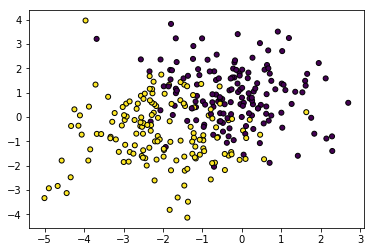

In [133]:
X, y = datasets.make_blobs(n_samples=300,centers=2,center_box=(-2,2), cluster_std=1.2, random_state=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')




In [134]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [135]:
from sklearn import tree
bad_tree = tree.DecisionTreeClassifier()
bad_tree.fit(X_train, y_train)
bad_tree.score(X_train, y_train)

1.0

Woohoo!  Perfect score!  We have fit the training data perfectly.  

This tree is best tree.

In [136]:
# Borrow a function to plot decision boudaries
# http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, 
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

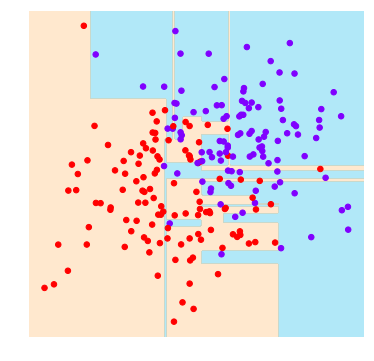

In [137]:
plt.figure(figsize=(6,6))
visualize_classifier(bad_tree,X_train,y_train)
plt.show()

We see that the default tree "learns" every single point.  This is overfitting.  

How well does it do on the test set?

In [138]:
bad_tree.score(X_test, y_test)

0.78666666666666663

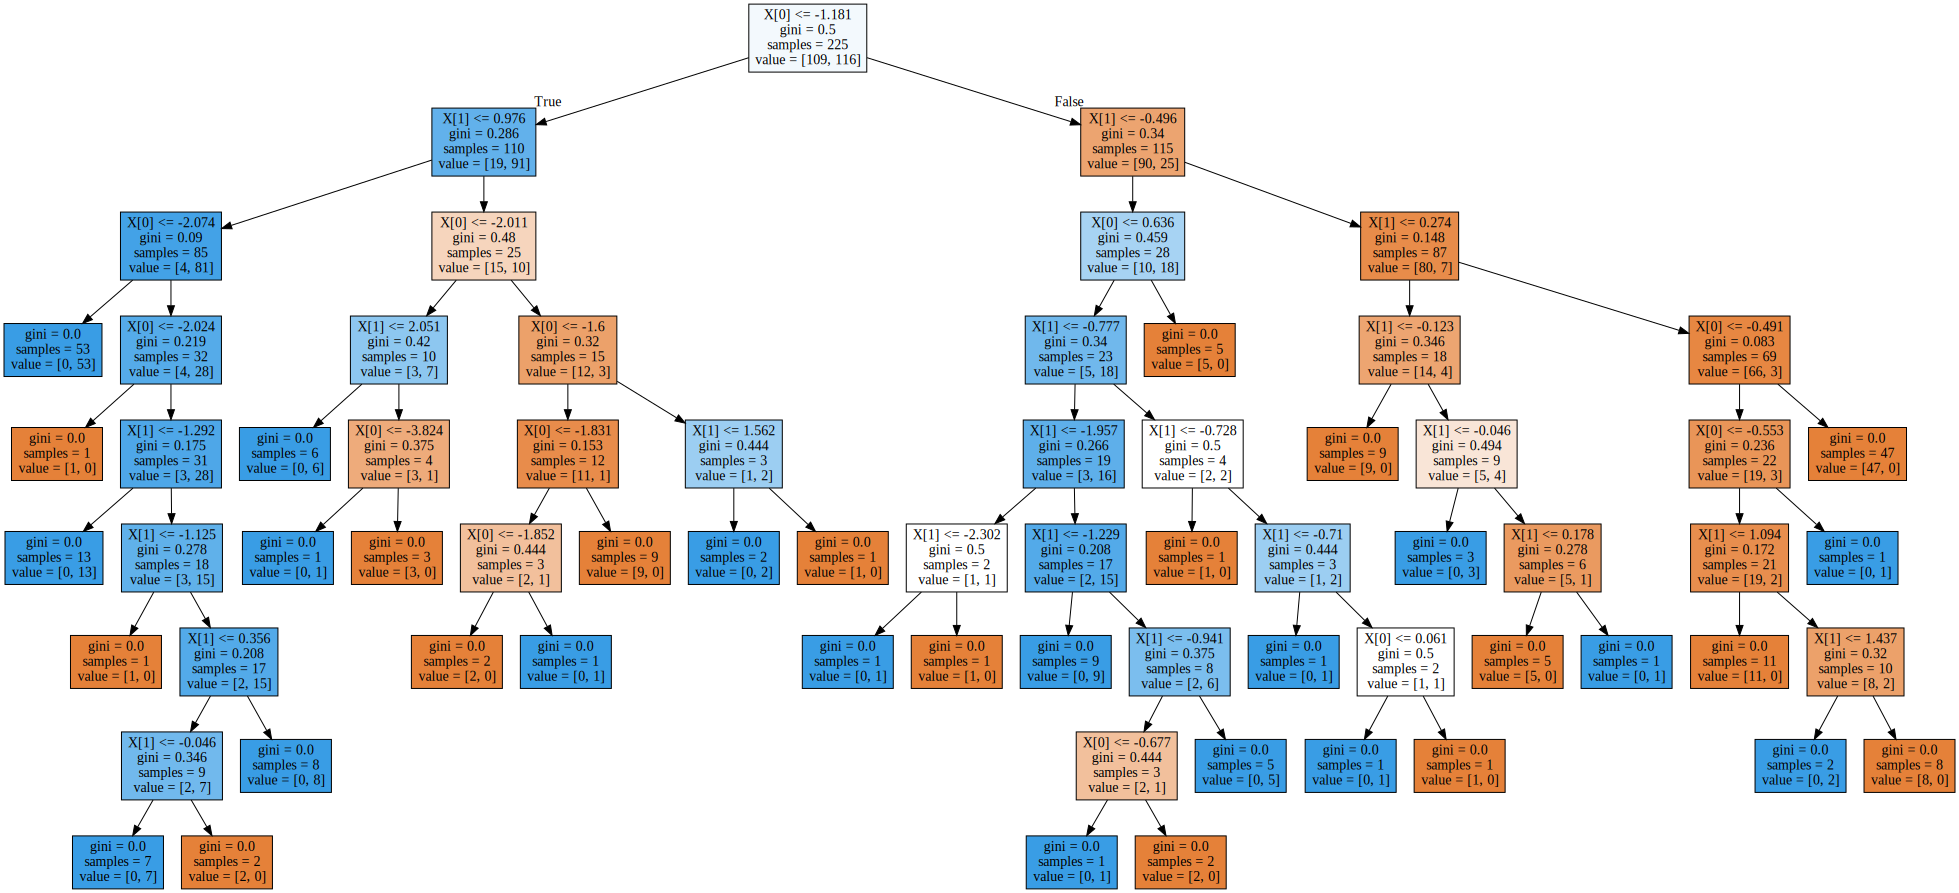

In [139]:
# What's our tree look like?
#I had to run this command "conda install python-graphviz",  NOT "pip install graphviz".   
import graphviz 
dot_data = tree.export_graphviz(bad_tree, out_file=None, filled=True) 
graph = graphviz.Source(dot_data) 
graph 

In [147]:
# Try again
better_tree = tree.DecisionTreeClassifier(max_depth=2)
better_tree.fit(X_train, y_train)
better_tree.score(X_test, y_test)


0.82666666666666666

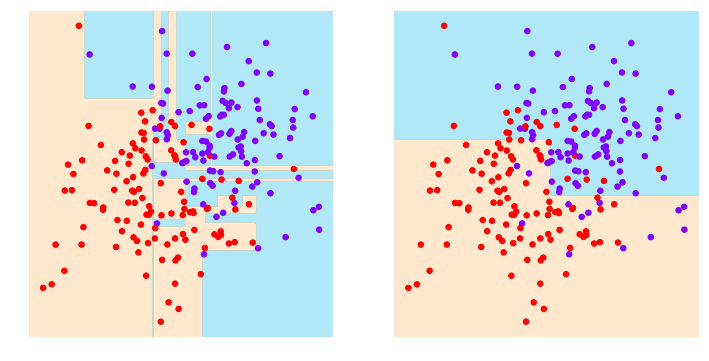

In [148]:
plt.figure(figsize=(12,6))

plt.subplot(121)
visualize_classifier(bad_tree,X_train,y_train)

plt.subplot(122)
visualize_classifier(better_tree,X_train,y_train)

plt.show()

Which decision boundary do you believe?

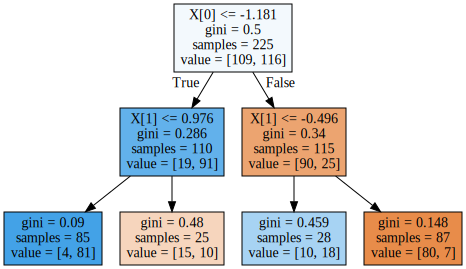

In [149]:
dot_data = tree.export_graphviz(better_tree, out_file=None, filled=True) 
graph = graphviz.Source(dot_data) 
graph 

We can also look at the tree structure this way
http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

Try a systematic way of testing depths

https://www.kaggle.com/drgilermo/playing-with-the-knobs-of-sklearn-decision-tree


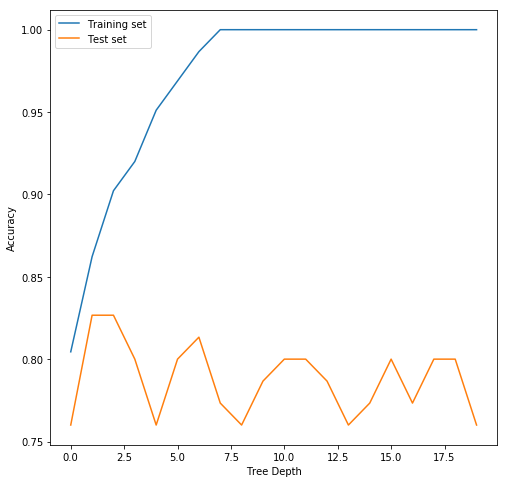

In [146]:
test_score = []
train_score = []
for depth in range(20):
    clf = tree.DecisionTreeClassifier(max_depth = depth + 1)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(range(20),train_score)
plt.plot(range(20), test_score)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])